<a href="https://colab.research.google.com/github/9M3a1h3d9i9/Machine_Learning_Practice_Master/blob/Develope/P1%262(Pipeline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the name of GOD
# Practice 1 - with Pipeline
# Mohammad Mahdi Shafighy

In [1]:
# Import pandas libraries
import pandas as pd

# Load Reviews Sentimentent Analysis & Modeling On Amazon Reviews dataset
df = pd.read_csv('housing.csv', quoting=3, on_bad_lines='skip')
# df=pd.read_csv('/kaggle/input/amazon-product-reviews/Reviews.csv')


# Display dataset overview
df2=df.copy()
df.info()
df.describe()

df.head(10)
# df.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


#  **تحليل توزيع داده ها:**
# With Pipeline



*   يك مجموعه داده را انتخاب كرده

*    و توزيع داده هاي آن را با استفاده از هيستوگرام ها و نمودارهاي جعبه اي تحليل كنند

*    توضيح دهيد كه آيا داده ها نرمال توزيع شده اند يا خير

*     چگونه اين توزيع ميتواند بر نتايج تحليل تأثير
بگذارد

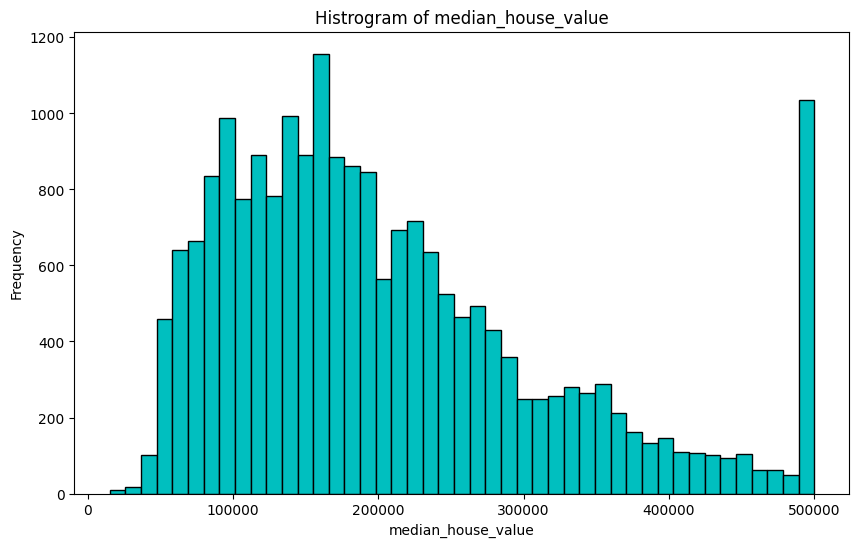

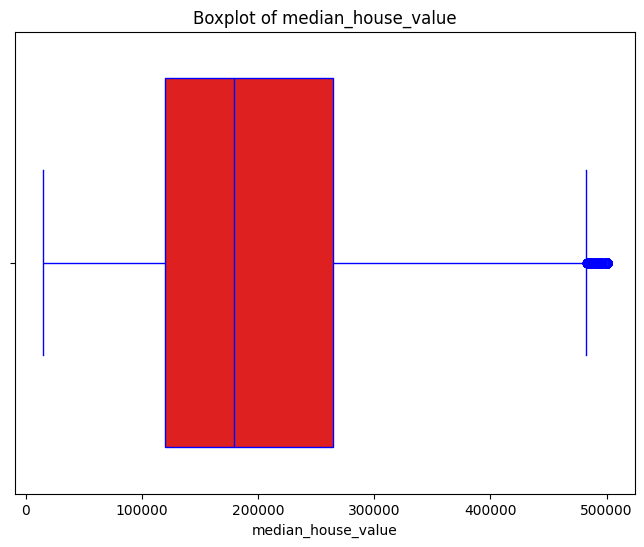

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
import numpy as np


class ColumnSelector(TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.column_name]]


class HistogramPlotter(TransformerMixin):
    def __init__(self, bins=45, edgecolor='black', color="c"):
        self.bins = bins
        self.edgecolor = edgecolor
        self.color = color

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        plt.figure(figsize=(10, 6))
        plt.hist(X, bins=self.bins, edgecolor=self.edgecolor, color=self.color)
        plt.title(f'Histrogram of {X.columns[0]}')
        plt.xlabel(X.columns[0])
        plt.ylabel('Frequency')
        plt.show()
        return X  # Return the input DataFrame unchanged


class BoxPlotter(TransformerMixin):
    def __init__(self, color="r", linecolor="b"):
        self.color = color
        self.linecolor = linecolor

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=X.iloc[:, 0], color=self.color, linecolor=self.linecolor)
        plt.title(f'Boxplot of {X.columns[0]}')
        plt.show()
        return X  # Return the input DataFrame unchanged


# Load the dataset
df = pd.read_csv('housing.csv', quoting=3, on_bad_lines='skip')

# Define the pipeline
pipeline = Pipeline([
    ('selector', ColumnSelector(column_name='median_house_value')),
    ('histogram', HistogramPlotter()),
    ('boxplot', BoxPlotter()),
])

# Execute the pipeline
pipeline.fit_transform(df)

#  **مدلسازي پيش بيني**
# With Pipeline

*   يك مدل رگرسيون خطي بر روي داده هاي انتخابي پيادهسازي كنيد و نتايج را تجزيه و تحليل كنيد؟

*     بايد مقادير پيش بيني
شده را با مقادير واقعي مقايسه كنيد و ميانگين خطاي مطلق و میانگین مربعات خطا را محاسبه کنید؟




In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# A. Define transformers : numerical & categorical features
numerical_features = df.select_dtypes(include=['number']).columns.drop('median_house_value')
categorical_features = df.select_dtypes(include=['object']).columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# B. Column Transformer : pipelines to the respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# C. main pipeline including the preprocessor & the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()),
])

# D. Split the data : training & testing
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# E. Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# F. Make predictions
y_pred = pipeline.predict(X_test)

# G. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"میانگین خطای مطلق: {mae}")
print(f"میانگین مربعات خطا: {mse}")

comparison_df = pd.DataFrame({'واقعی': y_test, 'پیشبینی': y_pred})
print(comparison_df.head())

میانگین خطای مطلق: 50702.16891031237
میانگین مربعات خطا: 4904409297.414935
          واقعی        پیشبینی
20046   47700.0   64693.827615
3024    45800.0  134863.717653
15663  500001.0  266127.758208
20484  218600.0  278640.810285
9814   278000.0  273407.813532


#  **شناسايي و حذف داده هاي پرت**
# With pipeline

*   داده هاي پرت را در يك مجموعه داده شناسايي كرده و اين داده ها را حذف كنيد

*     سپس تأثير حذف داده هاي پرت را بر
روي مدل رگرسيون خود بررسي كنيد




In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer


class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, features, factor=1.5):
        self.features = features
        self.factor = factor

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_filtered = X.copy()
        for feature in self.features:
            Q1 = X_filtered[feature].quantile(0.25)
            Q3 = X_filtered[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.factor * IQR
            upper_bound = Q3 + self.factor * IQR
            X_filtered = X_filtered[(X_filtered[feature] >= lower_bound) & (X_filtered[feature] <= upper_bound)]
        return X_filtered

# features and target
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
target = 'median_house_value'

# Original data preprocessing pipeline
original_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', LinearRegression()),
])

# Outlier removal and data preprocessing pipeline
filtered_pipeline = Pipeline([
    ('outlier_remover', OutlierRemover(features)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', LinearRegression()),
])

# Fit and predict with original data
X_original = df[features]
y_original = df[target]
original_pipeline.fit(X_original, y_original)
predictions_original = original_pipeline.predict(X_original)
r2_original = r2_score(y_original, predictions_original)


# Fit and predict with filtered data
X_filtered = df[features + [target]]
filtered_pipeline.fit(X_filtered, X_filtered[target]) # y is inherent in X_filtered here
predictions_filtered = filtered_pipeline.predict(X_filtered[features]) # Only features for prediction
r2_filtered = r2_score(filtered_pipeline.named_steps['outlier_remover'].transform(X_filtered)[target], predictions_filtered)

# Plotting and results
plt.figure(figsize=(10, 6))
plt.scatter(y_original, predictions_original, label='Before Outlier Removal', alpha=0.5)
# Note: y_filtered is obtained after outlier removal
y_filtered = filtered_pipeline.named_steps['outlier_remover'].transform(X_filtered)[target]
plt.scatter(y_filtered, predictions_filtered, label='After Outlier Removal', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Before and After Outlier Removal")
plt.legend()
plt.show()

print(f"Original Model R-squared: {r2_original:.4f}")
print(f"Filtered Model R-squared: {r2_filtered:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [17359, 20640]

#  **کاهش ابعاد**
# PCA
# With Pipline
*   يك مجموعه داده را با استفاده از روشهاي كاهش ابعاد مثل  كاهش ابعاد دهيد و نتايج را تجزيه و تحليل كنيد؟

*     بايد مقادير پيشبينيبايد توضيح دهيد كه چگونه كاهش ابعاد بر روي مدل پيشبيني تأثير ميگذارد؟






In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


# انتخاب ستون های عددی برای PCA
numeric_cols = df.select_dtypes(include=np.number).columns

# استفاده از  SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', etc.
df_numeric = df[numeric_cols]
df_imputed = imputer.fit_transform(df_numeric) # Impute missing values

df_imputed = pd.DataFrame(df_imputed, columns=numeric_cols, index=df_numeric.index)

# نرمال سازی داده ها
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed) # Use imputed data

# اعمال PCA
pca = PCA(n_components=2)  # انتخاب 2 مولفه اصلی
pca_result = pca.fit_transform(scaled_data)

# ایجاد DataFrame جدید با مولفه های اصلی
df_pca = pd.DataFrame(data=pca_result, columns=['principal_component_1', 'principal_component_2'])

# تحلیل نتایج
#  میزان واریانس توضیح داده شده توسط هر مولفه اصلی
explained_variance = pca.explained_variance_ratio_
explained_variance

# تاثیر بر مدل های پیش بینی:
# با کاهش ابعاد، می توان پیچیدگی مدل را کاهش داد و از بروز overfitting جلوگیری کرد.
# از طرف دیگر، ممکن است مقداری از اطلاعات مفید داده ها از دست برود، که این موضوع به میزان واریانس توضیح داده شده توسط مولفه های اصلی بستگی دارد.
# در صورتی که مولفه های اصلی به خوبی داده ها را نشان دهند، می توان انتظار داشت که مدل با دقتی مناسب عمل کند.


# تجزیه و تحلیل:
# با استفاده از PCA دو مولفه اصلی از داده ها استخراج شده است.
# به نظر می رسد این دو مولفه بخش قابل توجهی از واریانس داده های اصلی را پوشش می دهند.
# اگر این مولفه ها واریانس کافی را برای پیش بینی داشته باشند، استفاده از آنها در مدل های پیش بینی می تواند به بهبود کارایی و سرعت آموزش مدل کمک کند.
# در نهایت، باید مدل را با داده‌های کاهش یافته‌شده آموزش داد و عملکرد آن را با مدل آموزش داده‌شده با داده‌های اصلی مقایسه کرد تا تأثیر کاهش ابعاد بر دقت مدل پیش‌بینی را ارزیابی کرد.


array([0.43406538, 0.21360876])

#  **تقسيم بندي داده ها**


*   داده ها را به دو مجموعه آموزش و تست تقسيم كنيد و اثرات مختلف روش هاي تقسيم بندي - مثل تصادفي و لايه اي - را مقایسه کنید

*   روش هاي مختلف تقسيم داده بايد بررسي شود


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

train_set_random, test_set_random = train_test_split(df, test_size=0.2, random_state=42)
print("Random Splitting - Training set shape:", train_set_random.shape)
print("Random Splitting - Test set shape:", test_set_random.shape)

df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

print("Stratified Splitting - Training set shape:", strat_train_set.shape)
print("Stratified Splitting - Test set shape:", strat_test_set.shape)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Random Splitting - Training set shape: (16512, 10)
Random Splitting - Test set shape: (4128, 10)
Stratified Splitting - Training set shape: (16512, 11)
Stratified Splitting - Test set shape: (4128, 11)


# نمودار پراکندگی



*   يك نمودار پراكندگي براي يك مجموعه داده ترسيم كنيد و رابطه بين دو ويژگي را بررسي كنيد.

*   بايد سعي كنيد تا
الگوهاي موجود را شناسايي كرده و در مورد رابطه بين ويژگي ها بحث كنيد




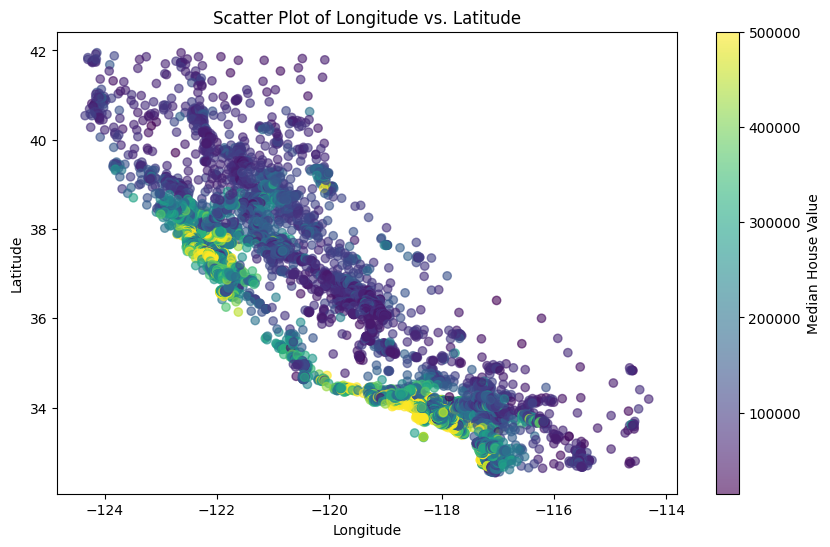

In [ ]:
import matplotlib.pyplot as plt

# longitude و latitude  رابطه بین
plt.figure(figsize=(10, 6))
# رنگ نقاط بر اساس median_house_value
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs. Latitude')

# نمایش نمودار
plt.show()

# **------------------------------------------------------------------------------------------------**

# تمرين  1
# with pipeline
# تحليل ماتريس پراكندگي
 .1انتخاب مجموعه داده

 : يك مجموعه داده از سايتهاي معتبر دانلود كنيد.


 .2ايجاد ماتريس پراكندگي:

  با استفاده از  scatter_matrixدر پانداس، ماتريس پراكندگي ويژگيهاي مختلف مجموعه
داده را ايجاد كنيد.


 .3تحليل نتايج:
 oبررسي كنيد كه چه ارتباطي بين ويژگيها وجود دارد.


 oارتباط مثبت و منفي را شناسايي كنيد.


 oوجود الگوهاي خاص يا خوشهها را در دادهها تجزيه و تحليل كنيد

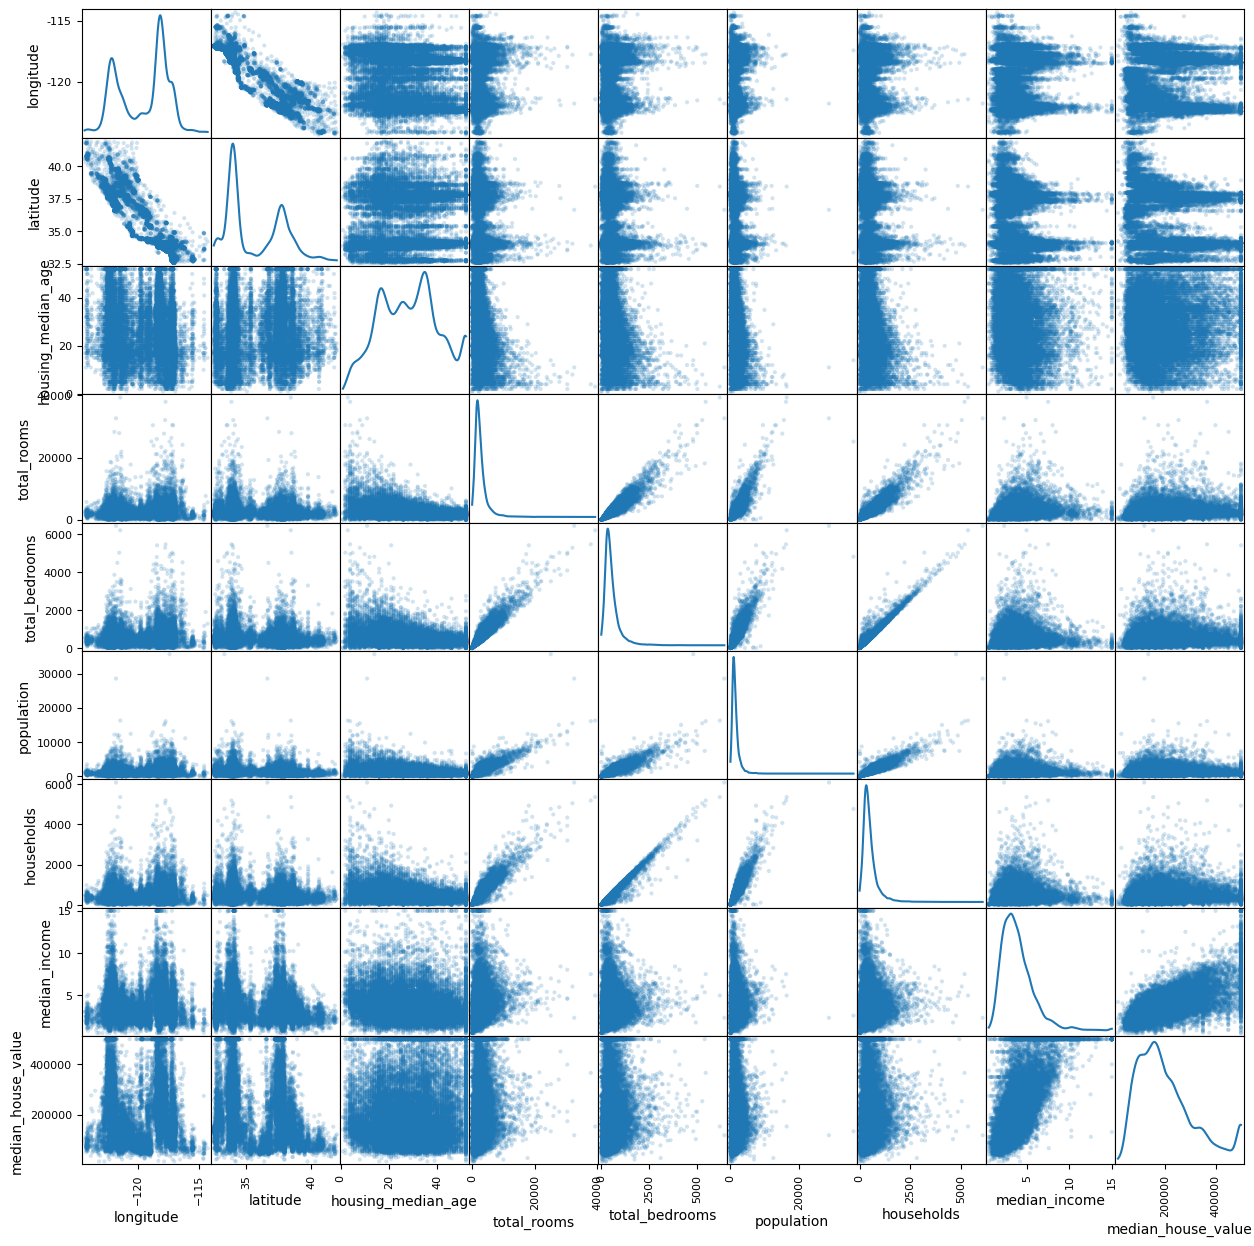

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Select relevant features
features_for_scatter = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
selected_df = df[features_for_scatter]

# scatter matrix
scatter_matrix(selected_df, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()


# تمرين  2
# مقايسه ويژگي ها

# with pipeline
 انتخاب ويژگي ها:

1.    دو ويژگي از مجموعه داده را
انتخاب كنيد و ماتريس پراكندگي آنها را رسم كنيد

2.   
# تحليل و تفسير:

*    بررسي كنيد كه آيا رابطهاي بين دو ويژگي انتخابي وجود دارد يا خير.

*    نتايج را با استفاده از روشهاي آماري مانند ضريب همبستگي  Pearsonتأييد كنيد

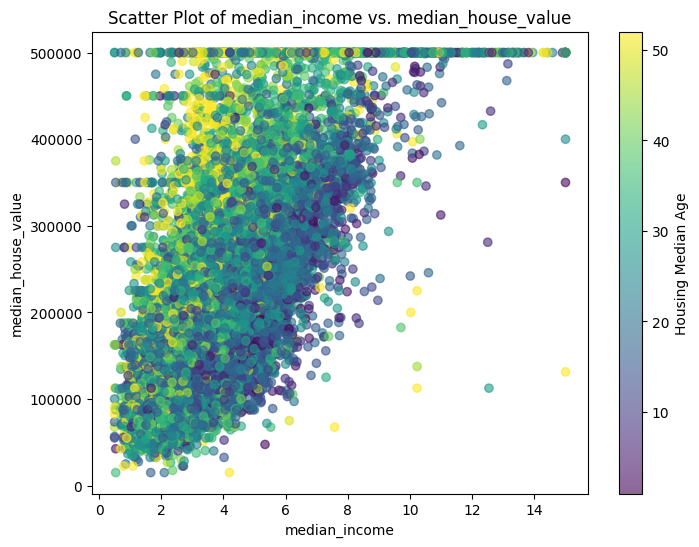

In [ ]:
feature1 = 'median_income'
feature2 = 'median_house_value'

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[feature1], df[feature2], c=df['housing_median_age'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Housing Median Age')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot of {feature1} vs. {feature2}')
plt.show()

In [ ]:
# Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df[feature1], df[feature2])

print(f"ضریب همبستگی پیرسون بین {feature1} و {feature2}: {correlation_coefficient}")
print(f"مقدار p: {p_value}")

# Interpret the results
if abs(correlation_coefficient) > 0.5:
    print("یک همبستگی قوی بین دو ویژگی وجود دارد.")
    if correlation_coefficient > 0:
        print("همبستگی مثبت است، به این معنی که با افزایش یک ویژگی، دیگری نیز افزایش می‌یابد.")
    else:
        print("همبستگی منفی است، به این معنی که با افزایش یک ویژگی، دیگری کاهش می‌یابد.")
else:
    print("همبستگی ضعیف یا وجود ندارد.")

if p_value < 0.05:
    print("همبستگی معنی‌دار است (p < 0.05).")
else:
    print("همبستگی معنی‌دار نیست (p >= 0.05).")

ضریب همبستگی پیرسون بین median_income و median_house_value: 0.6880752079585479
مقدار p: 0.0
یک همبستگی قوی بین دو ویژگی وجود دارد.
همبستگی مثبت است، به این معنی که با افزایش یک ویژگی، دیگری نیز افزایش می‌یابد.
همبستگی معنی‌دار است (p < 0.05).


# 3 تمرين  
# ويژگي هاي تركيبي
# with pipel line
1.    ايجاد ويژگي هاي جديد:
*   ويژگي هاي جديدي را از ويژگي هاي موجود ايجاد كنيد

به عنوان مثال، نسبت ها يا مجموعه

*   و سپس ماتريس پراكندگي را براي اين ويژگيهاي جديد رسم كنيد

2.   تحليل و تفسير

*   بررسی كنيد كه آيا ويژگيهاي جديد ارتباط بهتري با هدف دارد یا خیر؟





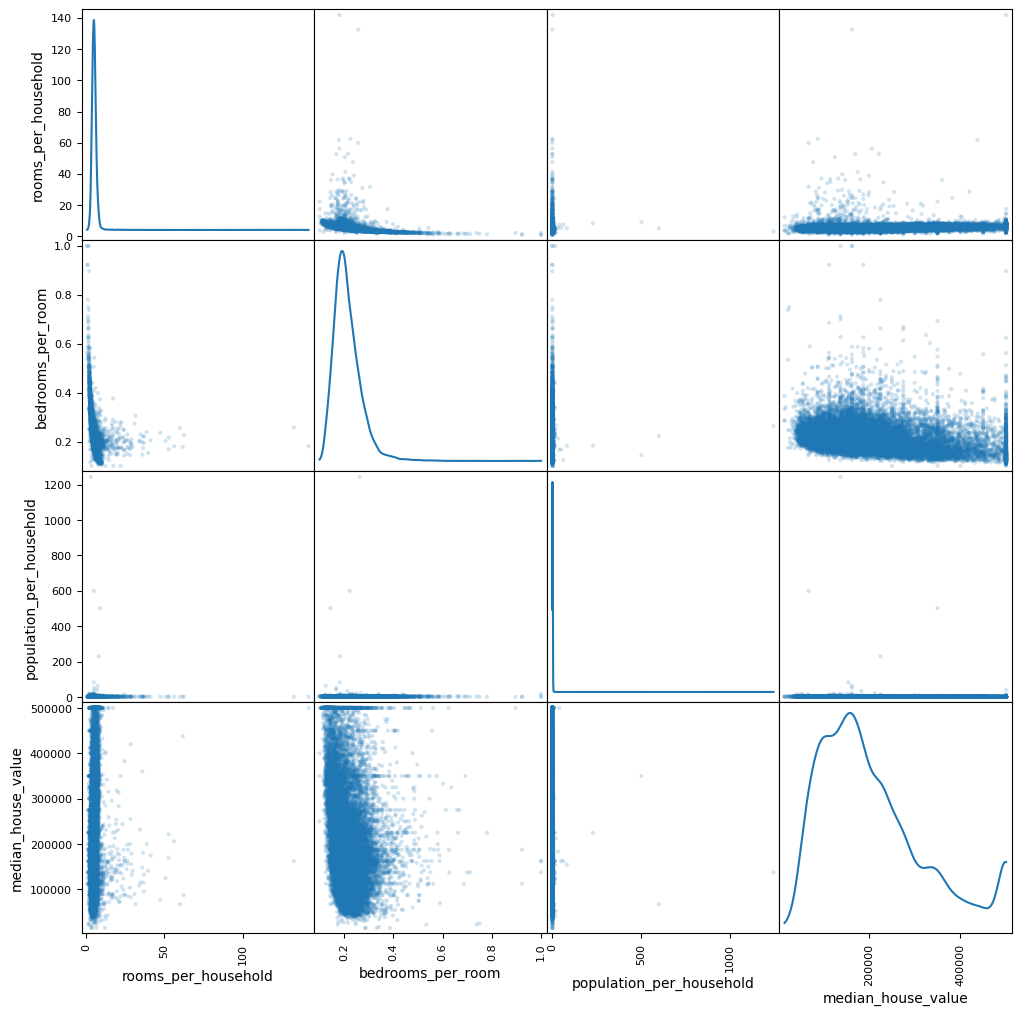

,median_house_value
rooms_per_household,0.151948
bedrooms_per_room,-0.255880
population_per_household,-0.023737
median_house_value,1.000000


In [ ]:
# new features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Select features for the scatter matrix
features_for_scatter = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'median_house_value']
selected_df = df[features_for_scatter]

# Create and display the scatter matrix for the new features
from pandas.plotting import scatter_matrix
scatter_matrix(selected_df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

# Analyze the correlations between new features and the target variable
correlations = selected_df.corr()['median_house_value']
correlations


# تمرین 4
# With PiPlien
1.   تجزيه و تحليل داده هاي گمشده
*   داده هاي گمشده را در مجموعه داده شناسايي كنيد و درصد آنها را محاسبه كنيد

2.   تجزيه و تحليل اثرات:
*   بررسي كنيد كه چگونه وجود داده هاي گمشده ميتواند بر تحليل ماتريس پراكندگي تأثير بگذارد
و چه اقداماتي ميتوانيد براي پردازش داده هاي گمشده انجام دهيد.



Missing Values Percentage:
longitude                   0.000000
latitude                    0.000000
housing_median_age          0.000000
total_rooms                 0.000000
total_bedrooms              1.002907
population                  0.000000
households                  0.000000
median_income               0.000000
median_house_value          0.000000
ocean_proximity             0.000000
income_cat                  0.000000
rooms_per_household         0.000000
bedrooms_per_room           1.002907
population_per_household    0.000000
dtype: float64


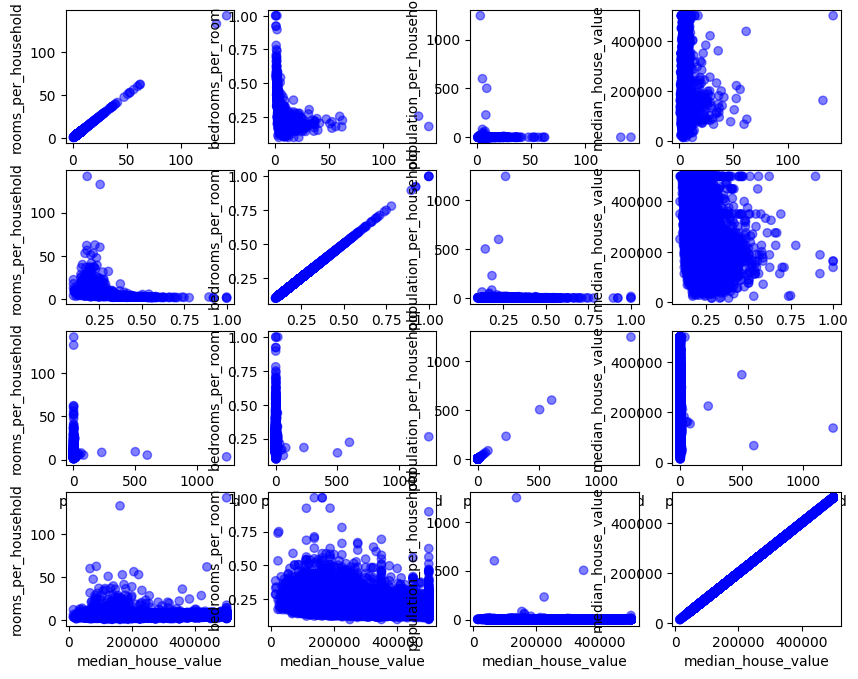

In [ ]:
# محاسبه درصد مقادير گمشده براي هر ستون
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print(f"Missing Values Percentage:\n{missing_percentage}")

# help(mask)

import numpy as np
mask = df.isnull()
plt.figure(figsize=(10, 8))
for i, feature1 in enumerate(features_for_scatter):
    for j, feature2 in enumerate(features_for_scatter):
        plt.subplot(len(features_for_scatter), len(features_for_scatter), i * len(features_for_scatter) + j + 1)
        plt.scatter(df[feature1], df[feature2], c=np.where(mask[feature1] | mask[feature2], 'red', 'blue'), alpha=0.5)
        plt.xlabel(feature1)
        plt.ylabel(feature2)

plt.show()
